# Chicago Illinois Inspections

Inciamos cargando los datos respectivos y librerias que nos serán de utilidad en el análisis que se llevara a cabo.

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as ptl

datos = pd.read_csv(r"C:\Users\esteb\Desktop\Proyecto GAP\ChicagoIllinois-Restaurants.csv")
datos.head()

,inspection_id,aka_name,dba_name,license_number,facility_type,risk,address,state,city,zip,inspection_date,inspection_type,results,violations,latitude,longitude,location
0,1151931,BZ MART,BZ MART,2304387.0,Grocery Store,Risk 3 (Low),4701 S WESTERN BLVD,IL,CHICAGO,60609.0,2014-01-17T00:00:00,License Re-Inspection,Pass,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.808373,-87.683726,"(41.8083731277443, -87.68372600471193)"
1,1395530,JIMMY JOHN'S,JIMMY JOHN'S STORE # 722,2279570.0,Restaurant,Risk 1 (High),1519 E 55TH ST,IL,CHICAGO,60615.0,2014-01-16T00:00:00,Short Form Complaint,Pass,NaN,41.795083,-87.588313,"(41.795082532364255, -87.58831293902966)"
2,1395529,SUBWAY,SUBWAY,2074313.0,Restaurant,Risk 1 (High),51 W 79TH ST,IL,CHICAGO,60620.0,2014-01-16T00:00:00,Canvass,Pass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.750814,-87.626711,"(41.750813934830596, -87.62671100515273)"
3,1395528,MILWAUKEE FRESH MARKET,MILWAUKEE FRESH MARKET,2262155.0,Grocery Store,Risk 2 (Medium),3647-3651 W DIVERSEY AVE,IL,CHICAGO,60647.0,2014-01-16T00:00:00,Complaint,Pass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.931776,-87.719103,"(41.93177578799307, -87.7191028381685)"
4,1393269,DOMINICK'S,"DOMINICK'S Finer Foods, Inc. #1695",41682.0,Grocery Store,Risk 1 (High),959 W FULLERTON AVE,IL,CHICAGO,60614.0,2014-01-16T00:00:00,Canvass,Out of Business,NaN,41.925268,-87.653488,"(41.925268275703296, -87.65348756413924)"


La base de datos nos muestra los resultados de inspecciones a sitios donde se sirven alimentos, ya sea restaurantes, escuelas, hospitales, supermercados, etc. Cuenta con 28000 observaciones y podemos observar el tipo de establecimiento, el tipo de inspección, el código postal, el nombre legal del lugar, entre otros que se detallaran más adelante. La variable que nos interesa es la de resultados, esto pues no interesa determinar que tipo de lugares están aprovando las inspencciones y cuales no.

In [109]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 17 columns):
inspection_id      28000 non-null int64
aka_name           27758 non-null object
dba_name           28000 non-null object
license_number     27999 non-null float64
facility_type      27632 non-null object
risk               27990 non-null object
address            28000 non-null object
state              27987 non-null object
city               27972 non-null object
zip                27996 non-null float64
inspection_date    28000 non-null object
inspection_type    28000 non-null object
results            28000 non-null object
violations         20494 non-null object
latitude           27866 non-null float64
longitude          27866 non-null float64
location           27866 non-null object
dtypes: float64(4), int64(1), object(12)
memory usage: 3.6+ MB


Se puede notar que existen valores nulos en algunas columnas, además de que no hay valores númericos entre las variables, pues lo únicos valores que son números hacen referencia a la identidad o lincencia del lugar, o bien a la ubicación geográfica del sitio. Esto nos deja con variables categóricas que utilizaremos para estudiar la relación que tienen con la variable respuesta, o sea la variable de resultados.

## Trabajando con Pandas

Como los datos son agregados de forma manual, el nombre de los lugares puede aparecer de diferentes formas, aunque representen a una misma cadena de restaurantes. Por lo tanto se determina el factor común en la variable dba_name, que representa el nombre legal del establecimiento, en las instalaciones más repetidas. 

In [110]:
datos.dba_name = datos.dba_name.str.lower()
datos.loc[datos.dba_name.str.contains("subway"),'dba_name'] = "subway"
datos.loc[datos.dba_name.str.contains("dunkin"),'dba_name'] = "dunkin donuts"
datos.loc[datos.dba_name.str.contains("mcdona"),'dba_name'] = "mcdonald's"
datos.loc[datos.dba_name.str.contains("chipotle"),'dba_name'] = "chipotle mexican grill"
datos.loc[datos.dba_name.str.contains("eleven"),'dba_name'] = "7 eleven"
datos.loc[datos.dba_name.str.contains("papa john"),'dba_name'] = "papa john's pizza"
datos.loc[datos.dba_name.str.contains("jamba"),'dba_name'] = "jamba juice"
datos.loc[datos.dba_name.str.contains("whole food"),'dba_name'] = "whole foods market"
datos.loc[datos.dba_name.str.contains("caesar"),'dba_name'] = "little caesar's pizza"
datos.loc[datos.dba_name.str.contains("domino"),'dba_name'] = "domino's pizza"
datos.loc[datos.dba_name.str.contains("freshii"),'dba_name'] = "freshii"
datos.loc[datos.dba_name.str.contains("jimmy john"),'dba_name'] = "jimmy john's"
datos.loc[datos.dba_name.str.contains("kentucky"),'dba_name'] = "kfc"
datos.loc[datos.dba_name.str.contains("kfc"),'dba_name'] = "kfc"
datos.loc[datos.dba_name.str.contains("starbucks"),'dba_name'] = "starbucks"
datos.loc[datos.dba_name.str.contains("burger king"),'dba_name'] = "burger king"
datos.loc[datos.dba_name.str.contains("popeyes"),'dba_name'] = "popeyes"
datos.loc[datos.dba_name.str.contains("wendy"),'dba_name'] = "wendy's"
datos.loc[datos.dba_name.str.contains("pizza hut"),'dba_name'] = "pizza hut"
datos.loc[datos.dba_name.str.contains("j & j"),'dba_name'] = "j & j"
datos.loc[datos.dba_name.str.contains("boston market"),'dba_name'] = "boston market"
datos.loc[datos.dba_name.str.contains("church's chicken"),'dba_name'] = "church's chicken"
datos.loc[datos.dba_name.str.contains("family dollar"), 'dba_name'] = "family dollar"
datos.loc[datos.dba_name.str.contains("panda express"), 'dba_name'] = "panda express"
datos.loc[datos.dba_name.str.contains("jewel food"), 'dba_name'] = "jewel food" 
datos.loc[datos.dba_name.str.contains("afc"), 'dba_name'] = "afc sushi"
datos.head()

,inspection_id,aka_name,dba_name,license_number,facility_type,risk,address,state,city,zip,inspection_date,inspection_type,results,violations,latitude,longitude,location
0,1151931,BZ MART,bz mart,2304387.0,Grocery Store,Risk 3 (Low),4701 S WESTERN BLVD,IL,CHICAGO,60609.0,2014-01-17T00:00:00,License Re-Inspection,Pass,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.808373,-87.683726,"(41.8083731277443, -87.68372600471193)"
1,1395530,JIMMY JOHN'S,jimmy john's,2279570.0,Restaurant,Risk 1 (High),1519 E 55TH ST,IL,CHICAGO,60615.0,2014-01-16T00:00:00,Short Form Complaint,Pass,NaN,41.795083,-87.588313,"(41.795082532364255, -87.58831293902966)"
2,1395529,SUBWAY,subway,2074313.0,Restaurant,Risk 1 (High),51 W 79TH ST,IL,CHICAGO,60620.0,2014-01-16T00:00:00,Canvass,Pass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.750814,-87.626711,"(41.750813934830596, -87.62671100515273)"
3,1395528,MILWAUKEE FRESH MARKET,milwaukee fresh market,2262155.0,Grocery Store,Risk 2 (Medium),3647-3651 W DIVERSEY AVE,IL,CHICAGO,60647.0,2014-01-16T00:00:00,Complaint,Pass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.931776,-87.719103,"(41.93177578799307, -87.7191028381685)"
4,1393269,DOMINICK'S,"dominick's finer foods, inc. #1695",41682.0,Grocery Store,Risk 1 (High),959 W FULLERTON AVE,IL,CHICAGO,60614.0,2014-01-16T00:00:00,Canvass,Out of Business,NaN,41.925268,-87.653488,"(41.925268275703296, -87.65348756413924)"


En la explicación de la base de datos se formula una fe de erratas sobre los datos duplicados, pues los datos se van agregando de forma manual, y esto induce a errores. Una observación duplicada debe tener el mismo dba_name, la misma dirección, el mismo código postal y además la misma fecha de inspección. Se determina que hay 1227 observaciones duplicadas.

In [111]:
datos.drop_duplicates(subset = ('dba_name', 'address', 'zip' , 'inspection_date'), keep = "first", inplace = True)
datos.head()

,inspection_id,aka_name,dba_name,license_number,facility_type,risk,address,state,city,zip,inspection_date,inspection_type,results,violations,latitude,longitude,location
0,1151931,BZ MART,bz mart,2304387.0,Grocery Store,Risk 3 (Low),4701 S WESTERN BLVD,IL,CHICAGO,60609.0,2014-01-17T00:00:00,License Re-Inspection,Pass,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.808373,-87.683726,"(41.8083731277443, -87.68372600471193)"
1,1395530,JIMMY JOHN'S,jimmy john's,2279570.0,Restaurant,Risk 1 (High),1519 E 55TH ST,IL,CHICAGO,60615.0,2014-01-16T00:00:00,Short Form Complaint,Pass,NaN,41.795083,-87.588313,"(41.795082532364255, -87.58831293902966)"
2,1395529,SUBWAY,subway,2074313.0,Restaurant,Risk 1 (High),51 W 79TH ST,IL,CHICAGO,60620.0,2014-01-16T00:00:00,Canvass,Pass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.750814,-87.626711,"(41.750813934830596, -87.62671100515273)"
3,1395528,MILWAUKEE FRESH MARKET,milwaukee fresh market,2262155.0,Grocery Store,Risk 2 (Medium),3647-3651 W DIVERSEY AVE,IL,CHICAGO,60647.0,2014-01-16T00:00:00,Complaint,Pass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.931776,-87.719103,"(41.93177578799307, -87.7191028381685)"
4,1393269,DOMINICK'S,"dominick's finer foods, inc. #1695",41682.0,Grocery Store,Risk 1 (High),959 W FULLERTON AVE,IL,CHICAGO,60614.0,2014-01-16T00:00:00,Canvass,Out of Business,NaN,41.925268,-87.653488,"(41.925268275703296, -87.65348756413924)"


Cuando se observan los datos nulos de la variable de infracciones, nos encontramos con observaciones que pasaron, pasaron con condiciones o perdieron la inspección, por lo que se dictamina que lo mejor es eliminar esos datos. Tambien se borran los datos que no tienen longitud y latitud por la misma razón. Además se borran columnas que no seran de ayuda más adelante, como lo son aka_name, el nombre coloquial del establecimiento, license number, el número de licencia del lugar, state y city pues todas las observaciones son de Chicago, Illinois y el inspection_id.

In [112]:
datos = datos[datos.latitude.isnull() == False]  
datos = datos[datos.longitude.isnull() == False]
datos = datos[datos.violations.isnull() == False]
datos = datos[datos.city == "CHICAGO"]
del datos['aka_name']
del datos['license_number']
del datos['inspection_id']
del datos['state']
del datos['city']

Cuando vemos la diferrencia entre la cantidad de restaurantes y cualquier otro tipo de establecimiento es demasiado grande. Por lo que se procede a diferenciar entre los restaurantes y los demás. De esta forma creamos una variable binaria donde hay restaurante u otros, para que los dos niveles tengan una cantidad de observaciones robusta.

In [113]:
datos.facility_type.value_counts().head(20)

Restaurant                         13753
Grocery Store                       2393
School                              1351
Bakery                               355
Children's Services Facility         327
Daycare Above and Under 2 Years      243
Daycare (2 - 6 Years)                220
Long Term Care                       152
Catering                              89
Mobile Food Preparer                  78
Daycare Combo 1586                    67
Liquor                                62
Golden Diner                          45
Hospital                              43
TAVERN                                34
Mobile Food Dispenser                 26
Daycare (Under 2 Years)               20
GAS STATION                           13
Special Event                         12
Wholesale                             11
Name: facility_type, dtype: int64

Se decide categorizar como el nivel base el de restaurante y los demás son el nivel 1.

In [114]:
datos.facility_type = datos.facility_type.str.lower()
datos.loc[datos.facility_type.str.contains("restaurant", na = False),'facility_type'] = "restaurant"
datos.loc[datos.facility_type.str.contains("restaurant", na = False) == False,'facility_type'] = 1
datos.loc[datos.facility_type.str.contains("restaurant", na = False),'facility_type'] = 0
datos.facility_type.value_counts()

0    13783
1     5866
Name: facility_type, dtype: int64

Cuando vemmos la cantidad lugares que aprovaron, los que fallaron y los que pasaron con condiciones podemos ver que están muy dispares. Como pasar con condiciones y fallar, según la explicación de la base de datos, significa que se debe repetir la prueba, se determina que es mejor unir los dos niveles para así crear dos niveles bastante robustos. Por otro lado se eliminan las observaciones de restaurantes que ya estaban fuera de servicio.

In [115]:
datos.results.value_counts()

Pass                  11591
Fail                   4815
Pass w/ Conditions     3108
No Entry                125
Not Ready                 8
Out of Business           2
Name: results, dtype: int64

Se coloca como el nivel base a el resultado positivo, y los demás como el nivel 1.

In [116]:
datos = datos.loc[datos.results.str.contains("Business", na = False) == False]
datos.loc[datos.results.str.contains("Conditions", na = False),'results'] = "Fail"
datos.loc[datos.results.str.contains("Pass", na = False) == False,'results'] = "Fail"
datos.loc[datos.results.str.contains("Pass", na = False),'results'] = 0
datos.loc[datos.results.str.contains("Fail", na = False),'results'] = 1
datos.results.value_counts()

0    11591
1     8056
Name: results, dtype: int64

Igual que en casos anteriores, los datos que tenemos están muy disparejos en cuanto observaciones, por lo que se vuelve a separar los datos entre canvass (una inspección rutinaria) con las demás. 

In [117]:
datos.inspection_type.value_counts()

Canvass                                   10757
Complaint                                  2464
Canvass Re-Inspection                      2322
License                                    2063
Complaint Re-Inspection                     843
Short Form Complaint                        535
License Re-Inspection                       532
Suspected Food Poisoning                     58
Recent Inspection                            31
Consultation                                 20
Suspected Food Poisoning Re-inspection       13
Non-Inspection                                4
Complaint-Fire                                3
Short Form Fire-Complaint                     2
Name: inspection_type, dtype: int64

Se elige el nivel canvass como el base, y los demás como el nivel 1.

In [118]:
datos.loc[datos.inspection_type.str.contains("Re-Inspection", na = False),'inspection_type'] = "other"
datos.loc[datos.inspection_type.str.contains("Canvass", na = False) == False,'inspection_type'] = "other"
datos.loc[datos.inspection_type.str.contains("Canvass", na = False),'inspection_type'] = 0
datos.loc[datos.inspection_type.str.contains("other", na = False),'inspection_type'] = 1
datos.inspection_type.value_counts()

0    10757
1     8890
Name: inspection_type, dtype: int64

Para la variable de riesgo se puede ver que esta desbalanceada, pero en este caso sucede algo particular. Los niveles de la variable reisgo son bajo, medio y alto, y cada uno fue designado por razones justificadas, por lo que un cambio en esto es cambiar el diseño del experimento de forma negativa, por lo que es mejor mantener la variable como se diseño. Se deja la variable bajo como el nivel base, el nivel 1 es el medio y el nivel alto es el 2. 

In [119]:
datos.loc[datos.risk.str.contains("Low", na = False),'risk'] = 0
datos.loc[datos.risk.str.contains("Medium", na = False),'risk'] = 1
datos.loc[datos.risk.str.contains("High", na = False),'risk'] = 2
datos.risk.value_counts()

2    14715
1     3960
0      972
Name: risk, dtype: int64

Para el caso de infracciones la separación ya esta determinada. Las infracciones que van de la 1 a la 29, son infracciones criticas y las que van de la 30 a la 44 y la 70 son leves. Se mantiene el caso base como las infracciones leves  y el nivel 1 son las criticas.

In [120]:
datos.violations = datos.violations[:].str[0:2]
datos.violations = pd.to_numeric(datos.violations, errors='coerce')
datos.loc[datos.violations < 30,'violations'] = 1
datos.loc[datos.violations == 70,'violations'] = 1
datos.loc[datos.violations > 29,'violations'] = 0
datos.violations.value_counts()

0.0    11700
1.0     7947
Name: violations, dtype: int64

Para el análisis que se quiere hacer se busco información de la ciudad de chicago. Una particular de esta ciudad es la lucha endémica que existe entre la parte sur de la ciudad y la parte norte de la misma. Creando así a dos ciudades distinas donde la parte norte se ve como la parte adinerada y de clase y el sur como los barrios bajos. Para la separación se utilizo la latitud de la calle que historicamente se reconoce como la división entre norte y sur. Por lo que todo establecimiento cuya latitud este por encima de 41.87 será de la parte del norte y si esta por debajo será de la parte sur. El nivel base es sur y el nivel 1 es el norte.  

In [121]:
datos['north_south'] = 0
datos.loc[datos.latitude > 41.87, 'north_south'] = 1
datos.north_south.value_counts()

1    12835
0     6812
Name: north_south, dtype: int64

Para una mejor disección de la ciudad se busco hacer una separación entre las 8 cominudades que conforman a la misma. De esta forma se dividio la base según su código postal, dado que este ya es una categorización de la ciudad por ubicación terrenal. Por lo que se procedio a unir a lol códigos para evitar tener tantos niveles.

In [122]:
datos['community'] = -1
Far_North_Side = [60666, 60631, 60656, 60646, 60630, 60625, 60659, 60626,60640, 60660, 60645, 60613]
datos.loc[datos.zip.isin(Far_North_Side), 'community'] = 0
North_West_Side = [60634, 60641, 60171, 60707, 60639]
datos.loc[datos.zip.isin(North_West_Side), 'community'] = 1
North_Side = [60618, 60657, 60647, 60614]
datos.loc[datos.zip.isin(North_Side), 'community'] = 2
West_Side = [60651, 60622, 60642, 60644, 60624, 60612, 60623, 60608]
datos.loc[datos.zip.isin(West_Side), 'community'] = 3
Central = [60610, 60611, 60654, 60601, 60607, 60605, 60616, 60661,60606,60603, 60602, 60604]
datos.loc[datos.zip.isin(Central), 'community'] = 4
South_west_side = [60638, 60632, 60609, 60629]
datos.loc[datos.zip.isin(South_west_side), 'community'] = 5
South_Side = [60653, 60621, 60615, 60637, 60649, 60636]
datos.loc[datos.zip.isin(South_Side), 'community'] = 6
Far_Southwest_Side = [60652, 60620, 60655, 60643]
datos.loc[datos.zip.isin(Far_Southwest_Side), 'community'] = 7
Far_Southeast_Side = [60619, 60628, 60617, 60827, 60633]
datos.loc[datos.zip.isin(Far_Southeast_Side), 'community'] = 8
datos.community.value_counts()

4    4201
0    3942
3    2846
2    2689
5    1380
1    1315
6    1214
8    1212
7     848
Name: community, dtype: int64

La separación anterior nos permite tener información más detallada de las circunstancias de cada restaurante. Usualemte se utiliza la expectativa de vida como una aproximación de la calidad de vida de las personas. Por lo que se utilizo la información del portal https://chicagolifeexp.tumblr.com para determinar si la calidad de vida es alta, media o baja. Donde el nivel base es bajo, el 1 es medio y el nivel 2 es alto.

In [123]:
datos['life_exp'] = 0
alta = [0,1,2]
normal= [3,4,5]
baja = [6,7,8]
datos.loc[datos.community.isin(alta), 'life_exp'] = 2
datos.loc[datos.community.isin(normal), 'life_exp'] = 1
datos.loc[datos.community.isin(baja), 'life_exp'] = 0

Por otro lado se busco la tasa de crimenes por cada 100 mil habitantes, pues es una aproximación de la seguridad de cada lugar. La información se tomo del portal https://www.neighborhoodscout.com/il/chicago/crime. El nivel base es inseguro, el nivel 1 es medio y el nivel 2 es seguro.

In [124]:
datos['crime_rate'] = 0
seguro = [0, 1, 5]
normal = [2, 7]
inseguro = [3,4,6,8]
datos.loc[datos.community.isin(seguro), 'crime_rate'] = 2
datos.loc[datos.community.isin(normal), 'crime_rate'] = 1
datos.loc[datos.community.isin(inseguro), 'crime_rate'] = 0

Por último se busco la densidad de población de cada zona, la información se obtuvo en el portal http://cartographicperspectives.org/index.php/journal/rt/printerFriendly/cp74-perdue/1076. El nivel base es bajo, el nivel 1 es medio y el nivel 2 es alto.

In [125]:
datos['pob_density'] = 0
Pob_densa = [1,2,3,4]
Pob_normal = [0,5,7]
Pob_baja = [6,8]
datos.loc[datos.community.isin(Pob_densa), 'pob_density'] = 2
datos.loc[datos.community.isin(Pob_normal), 'pob_density'] = 1
datos.loc[datos.community.isin(Pob_baja), 'pob_density'] = 0
datos.head()

,dba_name,facility_type,risk,address,zip,inspection_date,inspection_type,results,violations,latitude,longitude,location,north_south,community,life_exp,crime_rate,pob_density
0,bz mart,1,0,4701 S WESTERN BLVD,60609.0,2014-01-17T00:00:00,1,0,0.0,41.808373,-87.683726,"(41.8083731277443, -87.68372600471193)",0,5,1,2,1
2,subway,0,2,51 W 79TH ST,60620.0,2014-01-16T00:00:00,0,0,0.0,41.750814,-87.626711,"(41.750813934830596, -87.62671100515273)",0,7,0,1,1
3,milwaukee fresh market,1,1,3647-3651 W DIVERSEY AVE,60647.0,2014-01-16T00:00:00,1,0,0.0,41.931776,-87.719103,"(41.93177578799307, -87.7191028381685)",1,2,2,1,2
5,subway,0,2,1100 W TAYLOR ST,60607.0,2014-01-16T00:00:00,1,1,1.0,41.869566,-87.654278,"(41.86956628158364, -87.65427837887948)",0,4,1,0,2
6,chop suey kitchen,0,2,5353 W MADISON ST,60644.0,2014-01-16T00:00:00,0,0,0.0,41.880205,-87.759586,"(41.880205089634494, -87.75958648612682)",1,3,1,0,2


## Análisis Exploratorio de Datos

Al tener únicamente variables categóricas, procederemos a ver como se distribuyen los exitos y fallos en las variables que tenemos.

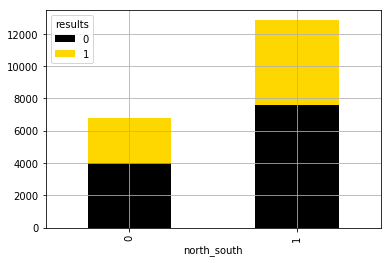

In [76]:
results_count  = pd.crosstab([datos.north_south], datos.results)
results_count.plot.bar(stacked=True, color=['black','gold'], grid=True)

Note que la mayor cantidad de fallos esta en en la parte norte de la ciudad. Por otro lado hay una mayor cantidad de establecimientos en esta parte.

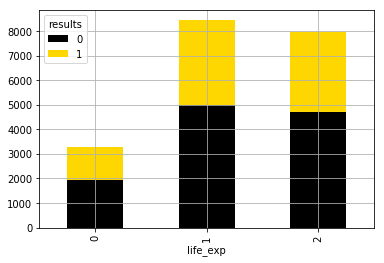

In [77]:
results_count  = pd.crosstab([datos.life_exp], datos.results)
results_count.plot.bar(stacked=True, color=['black','gold'], grid=True)

Cuando observamos la distribución con respecto a la esperanza de vida, no parece que haya una tendencia. El nivel base tiene en proporción más fallos que los otros dos niveles, aunque la diferencia no es tanta. 

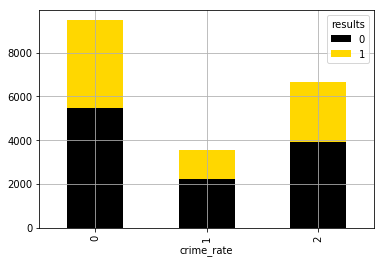

In [78]:
results_count  = pd.crosstab([datos.crime_rate], datos.results)
results_count.plot.bar(stacked=True, color=['black','gold'], grid=True)

Hay una gran cantidad de establecimientos en barrios con altas tasas de criminalidad.

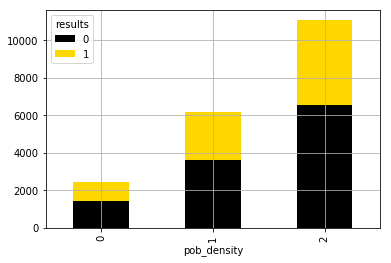

In [79]:
results_count  = pd.crosstab([datos.pob_density], datos.results)
results_count.plot.bar(stacked=True, color=['black','gold'], grid=True)

Se puede notar que, según lo que se esperaría, la mayoría de restaurantes esta en los lugares donde mayor densidad de población hay. 

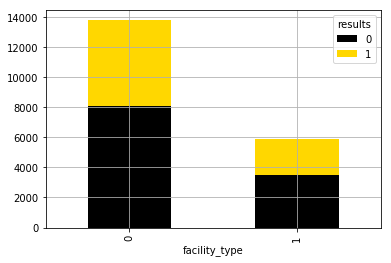

In [80]:
results_count  = pd.crosstab([datos.facility_type], datos.results)
results_count.plot.bar(stacked=True, color=['black','gold'], grid=True)

La mayor cantidad de fallos esta en los restaurantes, aunque en proporción hay mayor cantidad de fallos en el grupo de otros.

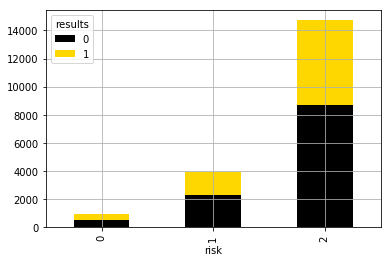

In [81]:
results_count  = pd.crosstab([datos.risk], datos.results)
results_count.plot.bar(stacked=True, color=['black','gold'], grid=True)

Hay una gran cantidad de establecimientos con alto riesgo, y la mayoría de fallos esta ahí. Aunque tambien hay muchos fallos en los otros dos niveles, en proporción.

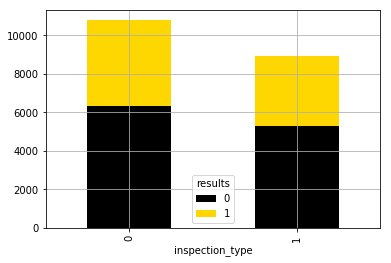

In [82]:
results_count  = pd.crosstab([datos.inspection_type], datos.results)
results_count.plot.bar(stacked=True, color=['black','gold'], grid=True)

Según el tipo de revisión, la mayoría de fallos esta en el grupo de canvass. 

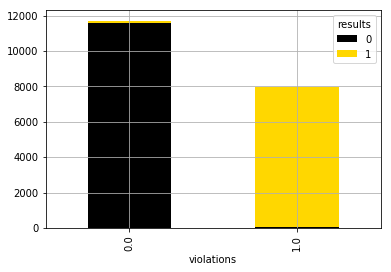

In [83]:
results_count  = pd.crosstab([datos.violations], datos.results)
results_count.plot.bar(stacked=True, color=['black','gold'], grid=True)

Por último en infracciones tenemos una particularidad. Las observaciones están bastante separad, lo que nos lleva a pensar que el reglamento indica que si se tiene una infracción critica, automaticamente se pierde la inspección, más adelante trataremos el caso con detalle.

## Regresión Logística

In [222]:
y = datos.pop('results')
X = datos.copy()

Elegimos la variable respuesta y separamos el resto de la base de datos.

In [223]:
del X['zip']
del X['address']
del X['latitude']
del X['longitude']
del X['location']
del X['inspection_date']
del X['dba_name']
X.head()

,facility_type,risk,inspection_type,violations,north_south,community,life_exp,crime_rate,pob_density
0,1,0,1,0.0,0,5,1,2,1
2,0,2,0,0.0,0,7,0,1,1
3,1,1,1,0.0,1,2,2,1,2
5,0,2,1,1.0,0,4,1,0,2
6,0,2,0,0.0,1,3,1,0,2


Eliminamos de la base todas la variables que no nos sirven.

In [224]:
X['pob_density'] = X['pob_density'].astype('category')
X['crime_rate'] = X['crime_rate'].astype('category')
X['life_exp'] = X['life_exp'].astype('category')
X['community'] = X['community'].astype('category')
X['north_south'] = X['north_south'].astype('category')
X['violations'] = X['violations'].astype('category')
X['inspection_type'] = X['inspection_type'].astype('category')
X['risk'] = X['risk'].astype('category')
X['facility_type'] = X['facility_type'].astype('category')

Le indicamos a nuestra base de datos que entienda las variables como categóricas.

In [225]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state=0)

Separamos la base entre datos de prueba y datos de entrenamiento.

In [226]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)
predicciones = clf.predict(X_test)

In [131]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, target_names, title = 'The Confusion Matrix', cmap = plt.cm.YlOrRd):
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.tight_layout()
    
    # Add feature labels to x and y axes
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    plt.colorbar()

0.9896522476675148
[[3471   14]
 [  47 2363]]


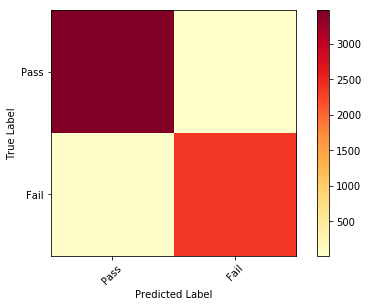

In [227]:
from sklearn.metrics import confusion_matrix
%matplotlib inline
cm = confusion_matrix(y_test, predicciones)
print(clf.score(X_test, y_test))
print(cm)

plot_confusion_matrix(cm, ["Pass", "Fail"])

Como ya se habia hablado, la variable de infracciones no nos sirve para estudiar el comportamiento que tienen las demás variables con el resultado de la prueba, por el alto nivel de causalidad que tiene esta variable con el resultado. Lo que nos da un 99% de precisión en la calificación, sin embargo no nos dice nada del análisis deseado. Por otro lado las tablas de confusión tienen el problema de la dependencia de umbral. Como la regresión logistica lo que nos da es un valor entre cero o uno, el valor se transforma en cero o uno según un umbral que se ponga. Para evitar esto y detallar el análisis de forma más precisa utilizaremos una curva ROC, método que no depende de ningun umbral y nos dara una prueba de la potencia de clasificación menos sesgada.

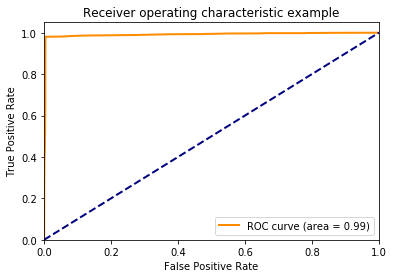

In [228]:
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
y_score = clf.predict_proba(X_test)

fpr[0], tpr[0], _ = roc_curve(y_test, y_score[:,1])
roc_auc[0] = auc(fpr[0], tpr[0])
plt.figure()

lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Procedemos a realizar el análisis sin la variable "violations"

In [229]:
del X['violations']

0.5910093299406276
[[3475   10]
 [2401    9]]


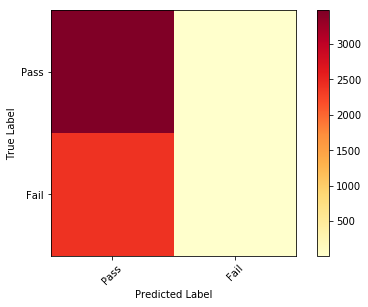

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=0)
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)
predicciones = clf.predict(X_test)
cm = confusion_matrix(y_test, predicciones)
print(clf.score(X_test, y_test))
print(cm)
plot_confusion_matrix(cm, ["Pass", "Fail"])

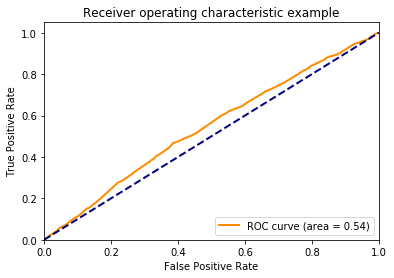

In [231]:
fpr = dict()
tpr = dict()
roc_auc = dict()
y_score = clf.predict_proba(X_test)
fpr[0], tpr[0], _ = roc_curve(y_test, y_score[:,1])
roc_auc[0] = auc(fpr[0], tpr[0])
plt.figure()
lw = 2


plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Procedemos a intetar hacer una selección de variables para intentar mejorar la predicción del modelo. La selección la hacemos mediante la regresión Lasso que nos dira que variables eliminar del modelo.

In [232]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X,y)
Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
print(clf.coef_)

[-0. -0. -0. -0. -0.  0. -0. -0.]


Notemos que la regresión Lasso nos dice que eliminemos todas las variables del modelo, por lo que se debe realizar un estudio más detallado es pertinente.

In [244]:
import statsmodels.api as sm
modelo = sm.GLM(y, X.astype(float), family=sm.families.Binomial())
resultados = modelo.fit()
resultados.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                results   No. Observations:                19647
Model:                            GLM   Df Residuals:                    19640
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13271.
Date:                Fri, 05 Oct 2018   Deviance:                       26541.
Time:                        00:51:17   Pearson chi2:                 1.96e+04
No. Iterations:                     4   Covariance Type:             nonrobust
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
facility_type      -0.0230      0.033     -0.704      0.481      -0.087       0.041
risk                0.0061      0.026      0.237      0.812      -0.044       0.057
inspection_type    -0.0056      0.029     -0.194      0.846      -0.063       0.051
community          -0.0488      0.009     -5.547      0.000      -0.066      -0.032
life_exp            0.0004      0.053      0.007      0.995      -0.103       0.104
crime_rate         -0.1075      0.031     -3.506      0.000      -0.168      -0.047
pob_density        -0.0894      0.033     -2.742      0.006      -0.153      -0.025
===================================================================================
"""

Con la información obtenida podemos darnos cuenta de varias situaciones. El valor p de la prueba z sobre los parametros, se puede aceptar que la hipotesis nula sobre la el valor de la mayoria de los parametros, o sea que su valor verdadero es cero y no tienen significancia a la hora de determinar el resultado de la variable respuesta, pero para el parametro de la variable comunidad, el de la densidad población  y la tasa de crimenes tiene suficiente significnacia estadistica para aceptar que tienen influencia sobre la variable respuesta. Por lo que haremos el ajuste con estas tres variables. Con la prueba Chi cuadrado de person podemos determinar que hay dependencia entre las variables.

In [245]:
del X['facility_type']
del X['risk']
del X['inspection_type']
del X['life_exp']
del X['north_south']
X.head()

,community,crime_rate,pob_density
0,5,2,1
2,7,1,1
3,2,1,2
5,4,0,2
6,3,0,2


0.5911789652247668
[[3485    0]
 [2410    0]]


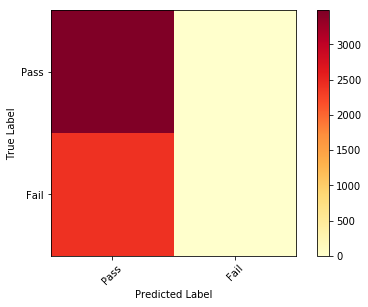

In [246]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=0)
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)
predicciones = clf.predict(X_test)
cm = confusion_matrix(y_test, predicciones)
print(clf.score(X_test, y_test))
print(cm)
plot_confusion_matrix(cm, ["Pass", "Fail"])

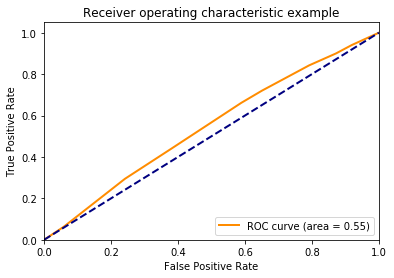

In [247]:
fpr = dict()
tpr = dict()
roc_auc = dict()
y_score = clf.predict_proba(X_test)
fpr[0], tpr[0], _ = roc_curve(y_test, y_score[:,1])
roc_auc[0] = auc(fpr[0], tpr[0])
plt.figure()
lw = 2


plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Note que hubo una leve mejora en la curva ROC, aunque el ajuste del modelo sigue siendo muy pobre. Para finalizar se puede ver que hay cierta influencia según la comunidad, la tasa de crimenes y la densidad de población a la hora del resultado de la prueba, aunque la influencia no es mucha.